In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ds = pd.read_csv('Data_for_UCI_named.csv')
ds

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [2]:
ds['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [3]:
ds = ds.drop(columns=['stab'])
X = ds.drop(columns= 'stabf')
y = ds['stabf']

In [4]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [5]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rescaled_train_ds = scaler.fit_transform(x_train)
rescaled_train_ds = pd.DataFrame(rescaled_train_ds, columns=x_train.columns)

In [6]:
rescaled_test_ds = scaler.transform(x_test)
rescaled_test_ds = pd.DataFrame(rescaled_test_ds, columns=x_test.columns)

In [7]:
#RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
random_c = RandomForestClassifier(random_state=1)
random_c.fit(rescaled_train_ds, y_train)
random_c_pred = random_c.predict(rescaled_test_ds)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
print(confusion_matrix(y_test, random_c_pred))

[[ 625   87]
 [  55 1233]]


In [45]:
print(classification_report(y_test, random_c_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [11]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

In [12]:
accuracy = accuracy_score(y_test, random_c_pred)
accuracy

0.929

In [15]:
recall = recall_score(y_test, random_c_pred, pos_label='stable')
round(recall,4)

0.8778

In [16]:
precision = precision_score(y_test, random_c_pred, pos_label='stable')
round(precision,4)

0.9191

In [17]:
f1 = f1_score(y_test, random_c_pred, pos_label='stable')
round(f1,4)

0.898

In [18]:
#XGBOOST CLASSIFICATION
from xgboost import XGBClassifier

XGB = XGBClassifier(random_state=1)
XGB.fit(rescaled_train_ds, y_train)
XGB_pred = XGB.predict(rescaled_test_ds)

In [19]:
print(confusion_matrix(y_test, XGB_pred))

[[ 648   64]
 [  45 1243]]


In [20]:
print(classification_report(y_test, XGB_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9351    0.9101    0.9224       712
    unstable     0.9510    0.9651    0.9580      1288

    accuracy                         0.9455      2000
   macro avg     0.9430    0.9376    0.9402      2000
weighted avg     0.9453    0.9455    0.9453      2000



In [22]:
accuracy_XGB = accuracy_score(y_test, XGB_pred)
accuracy_XGB

0.9455

In [23]:
recall_XGB = recall_score(y_test, XGB_pred, pos_label='stable')
round(recall_XGB,4)

0.9101

In [24]:
precision_XGB = precision_score(y_test, XGB_pred, pos_label='stable')
round(precision_XGB,4)

0.9351

In [25]:
f1_XGB = f1_score(y_test, XGB_pred, pos_label='stable')
round(f1_XGB,4)

0.9224

In [26]:
#LIGHTBOOST CLASSIFICATION
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier(random_state=1)
LGBM.fit(rescaled_train_ds, y_train)
LGBM_pred = LGBM.predict(rescaled_test_ds)

In [27]:
print(classification_report(y_test, LGBM_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



In [28]:
print(confusion_matrix(y_test, LGBM_pred))

[[ 635   77]
 [  48 1240]]


In [29]:
accuracy_LGBM = accuracy_score(y_test, LGBM_pred)
accuracy_LGBM

0.9375

In [30]:
recall_LGBM = recall_score(y_test, LGBM_pred, pos_label='stable')
round(recall_LGBM,4)

0.8919

In [31]:
precision_LGBM = precision_score(y_test, LGBM_pred, pos_label='stable')
round(precision_LGBM,4)

0.9297

In [32]:
f1_LGBM = f1_score(y_test, LGBM_pred, pos_label='stable')
round(f1_LGBM,4)

0.9104

In [33]:
#EXTRA TREES CLASSIFICATION
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(random_state=1)
ETC.fit(rescaled_train_ds, y_train)
ETC_pred = ETC.predict(rescaled_test_ds)

In [34]:
print(classification_report(y_test, ETC_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [35]:
print(confusion_matrix(y_test, ETC_pred))

[[ 606  106]
 [  38 1250]]


In [36]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,
                       
                       'min_samples_leaf': min_samples_leaf,
                       
                       'min_samples_split': min_samples_split,
                       
                       'max_features': max_features}

In [37]:
#RANDOMIZED SEARCH CV CLASSIFICATION
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator = ETC, param_distributions = hyperparameter_grid, random_state=1)
search = rand_search.fit(rescaled_train_ds, y_train)

In [38]:
search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [42]:
RCV_pred = rand_search.predict(rescaled_test_ds)

In [43]:
print(classification_report(y_test, RCV_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



In [48]:
best_tree_class = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=None, random_state=1)
best_tree_class.fit(rescaled_train_ds, y_train)
best_tree_class = best_tree_class.predict(rescaled_test_ds)

In [51]:
print(classification_report(y_test, best_tree_class, digits=4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



tau1    0.117397
tau2    0.118445
tau3    0.113169
tau4    0.115466
p1      0.039507
p2      0.040371
p3      0.040706
p4      0.040579
g1      0.089783
g2      0.093676
g3      0.096883
g4      0.094019
dtype: float64

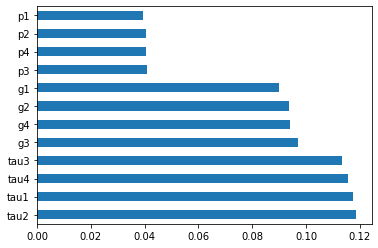

In [54]:
feat_importances = pd.Series(ETC.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
feat_importances